# Loans in US Exploration
## by Ivan Ramos

### Table of contents

1. [Introduction](#intro_section)<br />
    1.1 [Structure of dataset](#structure_section)<br />
    1.2 [Features of interest](#features_section)
2. [Preliminary wrangling](#wrangling_section)
3. [Univariate exploration](#univariate_section)<br />
    3.1 [Get data tidy](#cleaning_tidiness)<br />
    3.2 [Get data clean](#cleaning_quality)
4. [Bivariate exploration](#bivariate_section)
5. [Multivariate exploration](#multivariate_section)<br />
    5.1 [Ratings study](#ratings)<br />
    5.2 [Tweets media](#media)<br />
    5.3 [Favorite and Retweet count correlations](#correlations)<br />
    5.4 [Dog breeds](#dog_breeds)<br />
    5.5 [Doggos, puppers and other dog tags](#dog_tags)<br />

<a id="intro_section"></a>

### Introduction

Loan Data from Prosper is a dataset that contains 113,937 entries of loans in a period between fall of 2005 and first quarter 2014 across the US. Each entry contains interesting variables including  loan amount, insterest and APR rates, rating given by the Prosper financial agency,  current loan status, borrower income among others.

In [47]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

%matplotlib inline

In [48]:
loans_original = pd.read_csv('prosperLoanData.csv')
# Total Observations 113937
loans_original.shape

(113937, 81)

In [49]:
loans_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [50]:
pd.set_option('display.max_columns', None)
loans_original.sample(4)

ListingKey  ListingNumber            ListingCreationDate  \
23628  2AFC355591264663331AA11         630112  2012-08-27 12:55:20.210000000   
48272  537A34099428608749A6811         261066  2008-01-07 08:30:40.840000000   
84936  4E6D3372878237660D7D09F          53803  2006-10-26 19:46:51.703000000   
89660  4DF136019762322497D991D        1179978  2014-02-02 07:47:57.833000000   

      CreditGrade  Term  LoanStatus           ClosedDate  BorrowerAPR  \
23628         NaN    60  Chargedoff  2013-12-30 00:00:00      0.24302   
48272           B    36  Chargedoff  2009-08-12 00:00:00      0.19715   
84936           D    36   Completed  2007-02-26 00:00:00      0.17886   
89660         NaN    36     Current                  NaN      0.23847   

       BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
23628        0.2181       0.2081                   0.2032         0.0624   
48272        0.1825       0.1725                      NaN            NaN   
84936        0.1695       0.1645                      NaN            NaN   
89660        0.2010       0.1910                   0.1762         0.0925   

       EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  \
23628           0.1408                      4.0                     C   
48272              NaN                      NaN                   NaN   
84936              NaN                      NaN                   NaN   
89660           0.0837                      3.0                     D   

       ProsperScore  ListingCategory (numeric) BorrowerState  \
23628           5.0                          2            FL   
48272           NaN                          3            CO   
84936           NaN                          0           NaN   
89660           3.0                         15            OH   

                  Occupation EmploymentStatus  EmploymentStatusDuration  \
23628               Clerical         Employed                     227.0   
48272                  Other    Self-employed                      25.0   
84936  Engineer - Mechanical    Not available                       NaN   
89660                Teacher         Employed                      41.0   

       IsBorrowerHomeowner  CurrentlyInGroup GroupKey  \
23628                 True             False      NaN   
48272                 True             False      NaN   
84936                 True             False      NaN   
89660                 True             False      NaN   

                    DateCreditPulled  CreditScoreRangeLower  \
23628            2012-08-27 12:55:18                  680.0   
48272  2008-01-07 08:17:20.270000000                  700.0   
84936  2006-10-18 22:17:44.427000000                  620.0   
89660            2014-02-02 07:48:21                  700.0   

       CreditScoreRangeUpper FirstRecordedCreditLine  CurrentCreditLines  \
23628                  699.0     1997-05-14 00:00:00                12.0   
48272                  719.0     1998-09-19 00:00:00                11.0   
84936                  639.0     1997-08-13 00:00:00                 NaN   
89660                  719.0     1998-01-16 00:00:00                17.0   

       OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  \
23628             10.0                        27.0                      6   
48272              8.0                        35.0                      5   
84936              NaN                        31.0                      5   
89660             16.0                        36.0                      8   

       OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
23628                        321.0                   5.0             9.0   
48272                        362.0                   6.0             9.0   
84936                         85.0                   8.0            18.0   
89660                        631.0                   1.0             2.0   

       CurrentDelinquencies  AmountDelinquent  Delinquencie

In [6]:
# Let´s see if there are any duplicates on the dataset
loans_original.duplicated(subset='LoanKey').sum()

871

<a id="structure_section"></a>
### What is the structure of your dataset?

> There are  113,937 loan entries with 81 variables. After assessing data quality of variables, I found many of them could change in data type e.g. Prosper Ratings, borrower´s ocupation among others could be better represented as categories. Also some numeric values can be translated from floats to ints e.g. DelinquenciesLast7Years.
There are multiple ways of identify loans (LoanNumber, LoanKey, ListingKey, ListingNumber) this is redundant for our analysis so we can choose LoanKey as our identifer. Also, there are some duplicated entries we should drop before start analysis.
    

<a id="features_section"></a>
### What is/are the main feature(s) of interest in your dataset?

> I'm mainly interested in factors that can explain interest rates for a given loan and how strong are those factors comparing each other.
    

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> My expectation is that assigned prosper score (which determines overall how risky a loan could be) is the strongest factor that affects interest rate in a loan, however it could be significantly affected  by other factos such as loan amount, income range, delinquencies in the past, prosper rating among others.


<a id="wrangling_section"></a>
## Preliminary Wrangling

As most of datasets, normally extracted from diverse data sources, it is always a good practice to take the big picture of the gathered data, assess and in such case clean some aspects of data to ease further investigation.

##### Quick assesment notes
_Data cleaning_

- Delete duplicated entries
- Filter out entries with prosper score only. (As prosper score is our main independent variable of research, data documentation says that only records originated after July 2009, have prosper score available)
- Keep only variables of interest (LoanKey, ListingCreationDate, Term, LoanStatus, BorrowerAPR, BorrowerRate, LenderYield, ProsperRating (Alpha), Prosper Score, EmploymentStatus, IsBorrowerHomeOwner, FirstRecordedCreditLine, DelinquenciesLast7Years, BankcardUtilization, IncomeRange, TotalProsperLoans, LoanOriginalAmount)
- `IncomeRange` to category
- `ListingCreationDate` to date field
- `LoanStatus` to category
- `EmploymentStatus` to category
- `ProsperRating (Alpha)` rename to ProsperRating for simplicity and convert to category
- `FirstRecordedCreditLine` to date field
- `TotalProsperLoans` , change NaN´s to 0 (NaN represents no prior prosper loans in records according to prosper dictionary), convert to int



##### Some data clean up

Let´s address assessments above before dive into exploration

In [51]:
# Let´s copy original dataset before wrangling
loans = loans_original.copy()

Delete Duplicated Entries

In [52]:
loans.drop_duplicates(subset='LoanKey', inplace=True)

Filter out entries with prosper score only.

In [53]:
loans = loans[loans.ProsperScore.notnull()]
loans.ProsperScore = loans.ProsperScore.astype(np.int16)

Keep only variables of interest

In [54]:
columns_interest = ['LoanKey',
                    'ListingCreationDate',
                    'Term',
                    'LoanStatus',
                    'BorrowerAPR',
                    'BorrowerRate', 
                    'LenderYield',
                    'ProsperRating (Alpha)',
                    'ProsperScore',
                    'EmploymentStatus',
                    'IsBorrowerHomeowner',
                    'FirstRecordedCreditLine',
                    'DelinquenciesLast7Years',
                    'BankcardUtilization',
                    'IncomeRange',
                    'TotalProsperLoans',
                    'LoanOriginalAmount']
remove_columns = loans.columns.difference(columns_interest)
loans.drop(columns=remove_columns, inplace=True)

In [55]:
# Also set LoanKey as Index
loans.set_index("LoanKey", inplace=True)

`ProsperRating (Alpha)` renaming and converting to ordinal category

In [56]:
loans.rename(columns={'ProsperRating (Alpha)' : 'ProsperRating'}, inplace=True)

In [57]:
ratings_list = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
ratings_categories = pd.api.types.CategoricalDtype(categories=ratings_list, ordered=True)
loans.ProsperRating = loans.ProsperRating.astype(ratings_categories)

`IncomeRange` values to ordinal category 

In [58]:
# For those as 'Not display' or '$0', let´s mark them as NaN
loans.loc[loans.IncomeRange == 'Not employed', 'IncomeRange'] = np.NaN
loans.loc[loans.IncomeRange == '$0', 'IncomeRange'] = np.NaN

In [59]:
# Add categoriacal ordinal type
income_list = ['$1-24,999',
               '$25,000-49,999',
               '$50,000-74,999',
               '$75,000-99,999',
               '$100,000+']
income_categories = pd.api.types.CategoricalDtype(categories=income_list, ordered=True)
loans.IncomeRange = loans.IncomeRange.astype(income_categories)

`ListingCreationDate` and `FirstRecordedCreditLine` to date fields

In [60]:
loans.ListingCreationDate = loans.ListingCreationDate.astype(np.datetime64)
loans.FirstRecordedCreditLine = loans.FirstRecordedCreditLine.astype(np.datetime64)

`LoanStatus` to nominal category

In [61]:
status_list = loans.LoanStatus.unique().tolist()
status_category = pd.api.types.CategoricalDtype(status_list)
loans.LoanStatus = loans.LoanStatus.astype(status_category)

`EmploymentStatus` to nominal category. For all those with 'Not available', mark them as NaN

In [62]:
loans.loc[loans.EmploymentStatus == 'Not available', 'EmploymentStatus'] = np.NaN

In [63]:
employment_list = ['Self-employed',
 'Employed',
 'Full-time',
 'Other',
 'Not employed',
 'Part-time',
 'Retired']
employment_category = pd.api.types.CategoricalDtype(categories=employment_list, ordered=False)
loans.EmploymentStatus = loans.EmploymentStatus.astype(employment_category)

`TotalProsperLoans`  change NaN´s to 0

In [64]:
loans.loc[loans.TotalProsperLoans.isna(), 'TotalProsperLoans'] = 0
loans.TotalProsperLoans = loans.TotalProsperLoans.astype(np.int16)

<a id="univariate_section"></a>
## Univariate Exploration

I first want to see the independent variable (Prosper score) and dependent variable (Interest Rate) according to the hypothesis stated in the research statement.

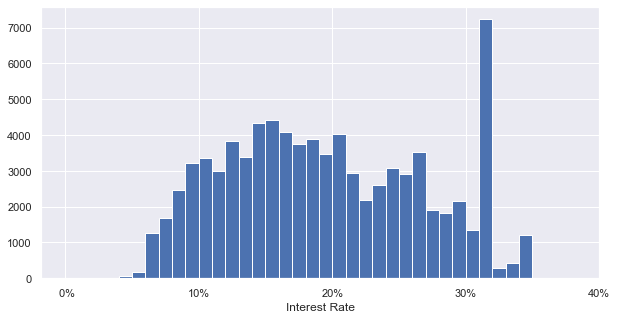

In [66]:
sb.set(style="darkgrid")
plt.figure(figsize=[10,5])
ax = plt.gca()
rate_bins = np.arange(0, loans.BorrowerRate.max() + 0.01, 0.01)
rate_ticks = np.arange(0, loans.BorrowerRate.max() + 0.1, 0.1)
rate_labels = ["{:2.0f}%".format(x*100) for x in rate_ticks]
plt.hist(data=loans, x='BorrowerRate', bins=rate_bins)
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(MultipleLocator(0.02))
plt.xticks(rate_ticks, rate_labels)
plt.xlabel('Interest Rate');
plt.show()

Distribution seems to align to a normal one.
Main curve peak is placed around 15%, but surprisingly there is another one even higher around 32%. This could represent a standard interest rate in loan products.

The next step is to visualize distribution of our main predictor variable 

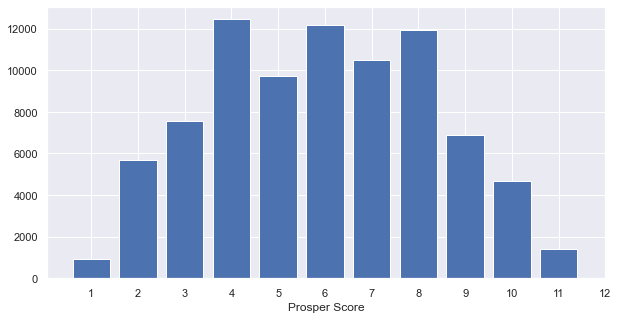

In [75]:
plt.figure(figsize=[10,5])
predictor_bins = np.arange(1, loans.ProsperScore.max() + 2, 1)
plt.hist(data=loans, x='ProsperScore', bins=predictor_bins, align='left', rwidth=0.8);
plt.xticks(predictor_bins, predictor_bins)
plt.xlabel('Prosper Score');

Prosper score is an estimation of how risky is a loan, going from 1 to 11, from riskiest to safest.
It shows a trimodal distribution with most common loans approved at the scores of 4, 6 and 7. Riskiest loans only represent 1.1% of total loans analyzed, while those safest 1.7%. 

Another interesting variable that deserves attention is the loan amount distribution

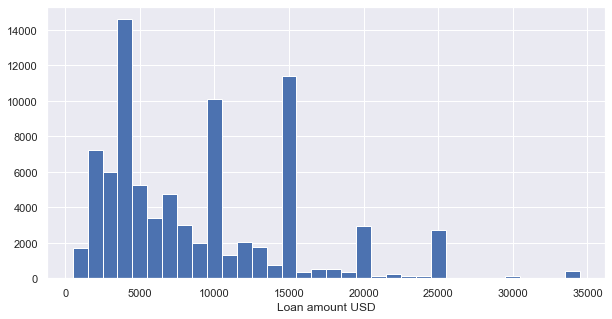

In [84]:
plt.figure(figsize=[10,5])
amount_bins = np.arange(1000, loans.LoanOriginalAmount.max() + 1000, 1000)
plt.hist(data=loans, x='LoanOriginalAmount', bins=amount_bins, align='left');
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(5000))
ax.xaxis.set_minor_locator(MultipleLocator(1000))
plt.xlabel('Loan amount USD');

Distribution is right skewed, concentrating most of the loans between first 10,000 US. Also, we can see there are common amounts, usually multiples of 5000 US (5000, 10000, 15000 and so on).

Along with Prosper rating, I have an initial hypothesis that income range and employment status have close relationship on interest rate. Let´s take a look at them as well.

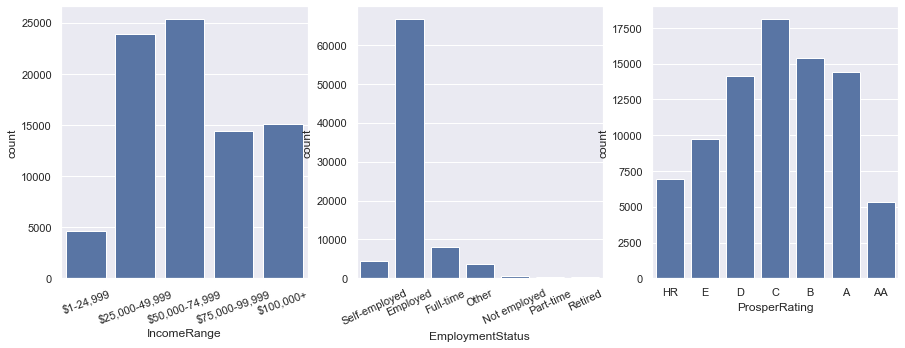

In [86]:
# Let´s dig into income range, employment status, prosper rating as our main independent vars 
plt.figure(figsize = [15, 5]) 
# Income Visualization
plt.subplot(1, 3, 1)
base_color = sb.color_palette()[0]
chart = sb.countplot(data=loans, x='IncomeRange', color=base_color)
chart.set_xticklabels(chart.get_xticklabels(), rotation=20);
# Employment status Visualization
plt.subplot(1, 3, 2)
chart = sb.countplot(data=loans, x='EmploymentStatus', color=base_color)
chart.set_xticklabels(chart.get_xticklabels(), rotation=25);
# Prosper Rating
plt.subplot(1, 3, 3)
sb.countplot(data=loans, x='ProsperRating', color=base_color);

We can see how people with income up to 24,999 strugle to get a loan. Also, there is a good demand on credit from more privileged people with incomes between 75,000+

As expected, employed people are likely to get a loan. In contrast, self-employed people (many of them could represent a micro business) does not seem to have easy access to loans.

While Prosper score relates to risky loans, prosper rating can be interpreted as the global qualification for a given loan. Both of them not necessarily match each other, indeed prosper rating has a more narrowed range. It shows a unimodal distribution with the center score 'C' as the mode.

There are other variables that might contribute to loan interests. Here is a quick look on them.

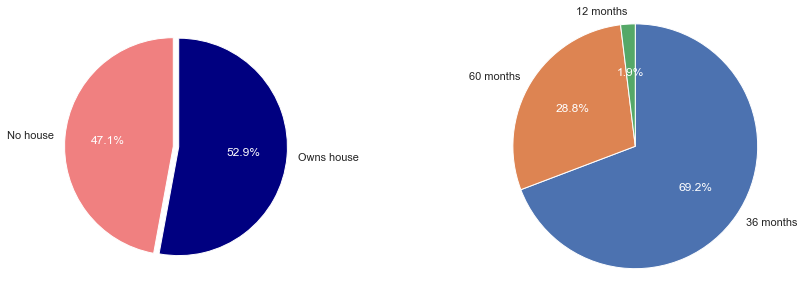

In [92]:
plt.figure(figsize = [15, 5]) 
# Owns a house
plt.subplot(1, 2, 1)

total = loans.shape[0]
with_house = loans[loans.IsBorrowerHomeowner == True].shape[0]
no_house = loans[loans.IsBorrowerHomeowner == False].shape[0]
with_house_p = with_house / total
no_house_p = no_house / total

colors = ['navy','lightcoral']
labels = ["Owns house", "No house"]

patches, texts, autotexts = plt.pie([with_house_p, no_house_p],
                                    labels=labels,
                                    autopct='%1.1f%%',
                                    explode=[0, 0.05],
                                    startangle=90,
                                    counterclock=False,
                                    colors=colors)
    
for text in autotexts:
    text.set_color('white')


# Term
plt.subplot(1, 2, 2)

one_year, three_years, five_years = loans[loans.Term == 12], loans[loans.Term == 36], loans[loans.Term == 60]
one_year_p = one_year.shape[0] / total
three_year_p = three_years.shape[0] / total
five_years_p = five_years.shape[0] / total
sorted_term = loans.Term.value_counts()


patches, texts, autotexts = plt.pie(sorted_term,
                                    labels=["{:1d} months".format(x) for x in sorted_term.index],
                                    autopct='%1.1f%%',
                                    explode=[0, 0, 0],
                                    startangle=90,
                                    counterclock=False)

for text in autotexts:
    text.set_color('white')

plt.axis('square');



People who owns a house is fair distributed with people who don´t.

Prosper score offers 3 terms for loan lifecycle. 3 years loans are by far the most popular.


_Bank card utilization_ is the percentage of available revolving credit that is utilized at the time the credit profile was pulled. 

Text(0.5, 0, 'Revolving credit utilized')

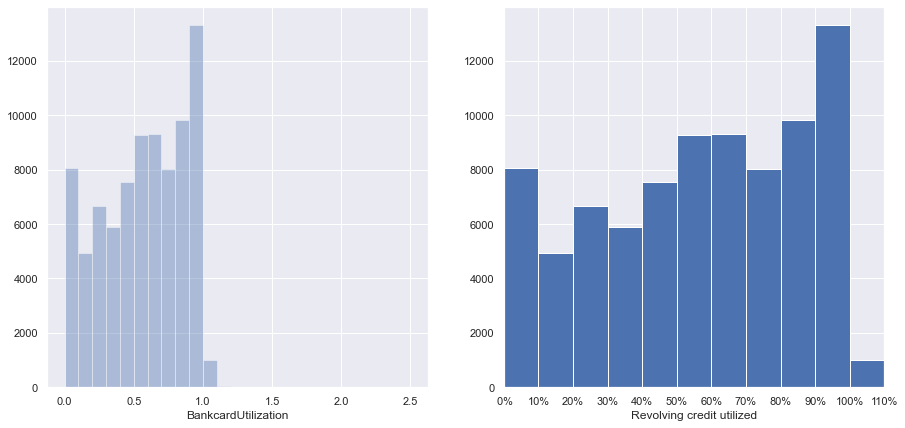

In [94]:
# Plot bank card utilization
plt.figure(figsize=[15,7])
plt.subplot(1, 2, 1)
loans.BankcardUtilization.describe()
utilization_bins = np.arange(0, loans.BankcardUtilization.max() + 0.1, 0.1)
chart = sb.distplot(loans.BankcardUtilization, bins=utilization_bins, kde=False)

# First plot seems to have some outliers, so let´s take a look closer where vast majority of points lie
plt.subplot(1, 2, 2)
plt.hist(loans.BankcardUtilization,bins= utilization_bins)
plt.xticks(utilization_bins, ["{:2.0f}%".format(x*100) for x in utilization_bins]);
plt.xlim((0, 1.1))
plt.xlabel("Revolving credit utilized")

Apparently , there are some outliers in this regard, people who has exceded their bank card utilization far beyond 100% percent. Normally, people has their revolvent credit utilized at their maximum credit line available. I think this factor might affect loan interest rate in some sense, or at least the prosper score given. Let´s see if those outliers are valid points:

In [29]:
loans.BankcardUtilization.describe()

count    83982.000000
mean         0.563972
std          0.301902
min          0.000000
25%          0.330000
50%          0.600000
75%          0.830000
max          2.500000
Name: BankcardUtilization, dtype: float64

In [96]:
bankcard_outliers = loans[loans.BankcardUtilization > 1.1]
"{:d} Loans that exceeded %110 credit card line at the moment loan was approved".format(bankcard_outliers.shape[0])

'77 Loans that exceeded %110 credit card line at the moment loan was approved'

In [97]:
# Let´s observe any potential wrong values on their vars
bankcard_outliers.sample(5)

ListingCreationDate  Term            LoanStatus  \
LoanKey                                                                       
D4C83656650370007C67E60 2012-06-24 13:07:00.830    36            Chargedoff   
EBED36413320742009FBED8 2012-01-13 14:08:29.423    36               Current   
77F23691962052938D70514 2013-08-30 13:45:16.687    36               Current   
D7B3369570301444201DAEE 2013-10-01 07:43:58.283    36  Past Due (1-15 days)   
E7BD3581652760181F43991 2010-02-25 18:51:26.430    36            Chargedoff   

                         BorrowerAPR  BorrowerRate  LenderYield ProsperRating  \
LoanKey                                                                         
D4C83656650370007C67E60      0.35797        0.3177       0.3077            HR   
EBED36413320742009FBED8      0.23990        0.2024       0.1924             C   
77F23691962052938D70514      0.31790        0.2786       0.2686             E   
D7B3369570301444201DAEE      0.33973        0.2999       0.2899            HR   
E7BD3581652760181F43991      0.36438        0.3400       0.3300            HR   

                         ProsperScore EmploymentStatus  IsBorrowerHomeowner  \
LoanKey                                                                       
D4C83656650370007C67E60             4         Employed                False   
EBED36413320742009FBED8             4          Retired                 True   
77F23691962052938D70514             2         Employed                False   
D7B3369570301444201DAEE             2         Employed                 True   
E7BD3581652760181F43991             1        Full-time                 True   

                        FirstRecordedCreditLine  DelinquenciesLast7Years  \
LoanKey                                                                    
D4C83656650370007C67E60              1992-09-22                      3.0   
EBED36413320742009FBED8              1989-10-17                      0.0   
77F23691962052938D70514              2002-10-29                      0.0   
D7B3369570301444201DAEE              1996-06-01                      0.0   
E7BD3581652760181F43991              1990-06-14                      8.0   

                         BankcardUtilization     IncomeRange  \
LoanKey                                                        
D4C83656650370007C67E60                 1.14  $50,000-74,999   
EBED36413320742009FBED8                 1.82  $25,000-49,999   
77F23691962052938D70514                 1.22  $25,000-49,999   
D7B3369570301444201DAEE                 1.13       $100,000+   
E7BD3581652760181F43991                 1.14  $50,000-74,999   

                         TotalProsperLoans  LoanOriginalAmount  
LoanKey                                                         
D4C83656650370007C67E60                  0                3500  
EBED36413320742009FBED8                  1                3000  
77F23691962052938D70514                  0                3000  
D7B3369570301444201DAEE                  0                4000  
E7BD3581652760181F43991                  1                2000

Text(0.5, 0, 'Loan amount')

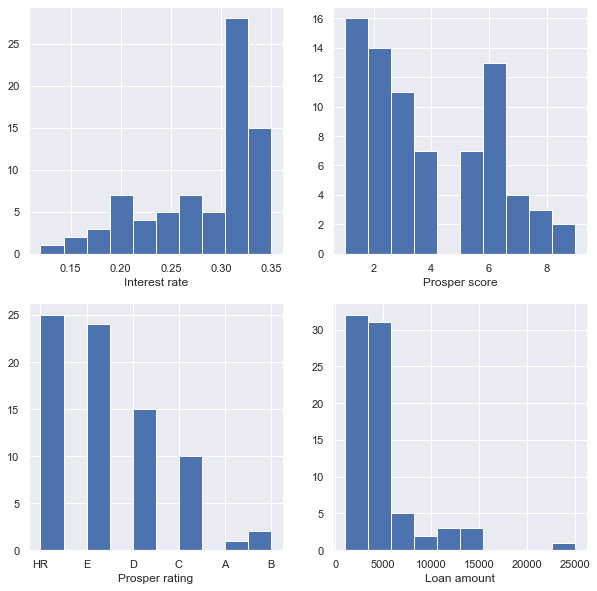

In [98]:
plt.figure(figsize=[10,10])
plt.subplot(2, 2, 1)
plt.hist(bankcard_outliers.BorrowerRate);
plt.xlabel("Interest rate")
plt.subplot(2, 2, 2)
plt.hist(bankcard_outliers.ProsperScore);
plt.xlabel("Prosper score")
plt.subplot(2, 2, 3)
plt.hist(bankcard_outliers.ProsperRating);
plt.xlabel("Prosper rating")
plt.subplot(2, 2, 4)
plt.hist(bankcard_outliers.LoanOriginalAmount);
plt.xlabel("Loan amount")

Well, we don´t see invalid data associated with overused bank credit cards loans. Of course, those loans tend to acquire high risk scores, smaller amounts (Mos of them around 5000 US) and with higher interest rate (around 30%). Looks like those are legitimate loans, so let´s keep them in our dataset.

Finally, let´s see how _Delinquencies_ for borrowers get distributed

Text(0.5, 0, 'Delinquencies in 7 years')

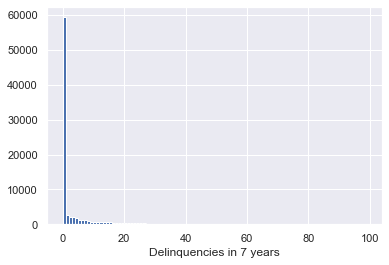

In [99]:
delinquencies_bins = np.arange(0, loans.DelinquenciesLast7Years.max() + 1, 1)
plt.hist(loans.DelinquenciesLast7Years, bins=delinquencies_bins);
plt.xlabel('Delinquencies in 7 years')

Wow! Distribution for delinquencies is way too much right skewed, so let´s apply transformations to better understand what is going on.

It is clear that vast mayority of borrowers have a clean credit history with zero delinquencies
so let´s focus on borrowers with non zero delinquencies

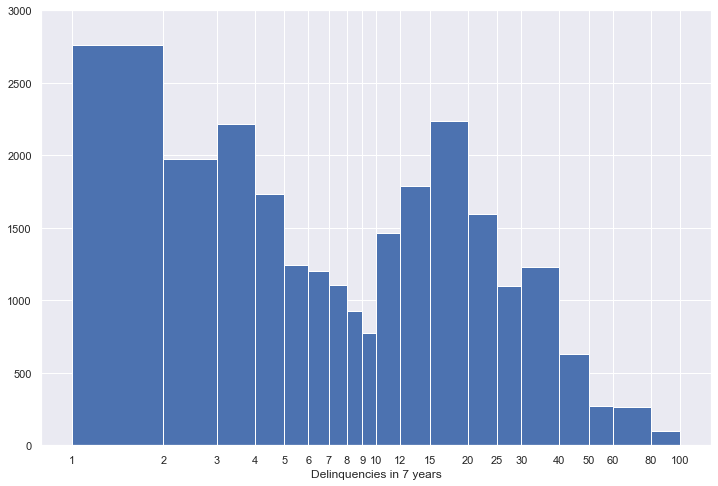

In [101]:
custom_bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25, 30, 40, 50, 60, 80, 100]
plt.figure(figsize=[12, 8])
plt.xscale('log')
plt.hist(loans.DelinquenciesLast7Years, bins=custom_bins, align='mid');
plt.xlabel('Delinquencies in 7 years')
plt.xticks(custom_bins, custom_bins)
y_ticks = np.arange(0, 3500, 500)
plt.ylim((0, 3000))
plt.yticks(y_ticks, y_ticks);


Much better! This chart shows a extreme zoom in over people with delinquencies in their credits. Honestly it is a surprise to me how people with tens of delinquencies in their credit history can still access to loans.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Interest rate presents a peculiar distribution with multiple spikes along its way. Most common interests are between 10% - 30% . There is an unusual high count for interest at 32%. This is definitely something to further investigate.
Regarding loan amounts, it is clearly a right skewed distribution, which means that small loan amounts are common , and high amounts are rare. Also, distribution presents multiple spikes, specially on 5000 US multiples. Population of loans with a average risk and proper rating are the most common.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Some data wranglin was necessary before starting research, mostly data type changes. Also removed unnecessary variables in dataset that are out of the scope of this investigation. 
For the study of registered delinquencies of borrowers in 7 years, using a linear scale simply did not work.
I had to use a log transformation to better visualize how delinquencies are distributed, being the most common values between 0 and 10 delinquencies by far.

<a id="bivariate_section"></a>
## Bivariate Exploration

I want to start this section by plotting a matrix of numeric variables that may affect interest rate. Let´s see if we can identify some interesting correlations

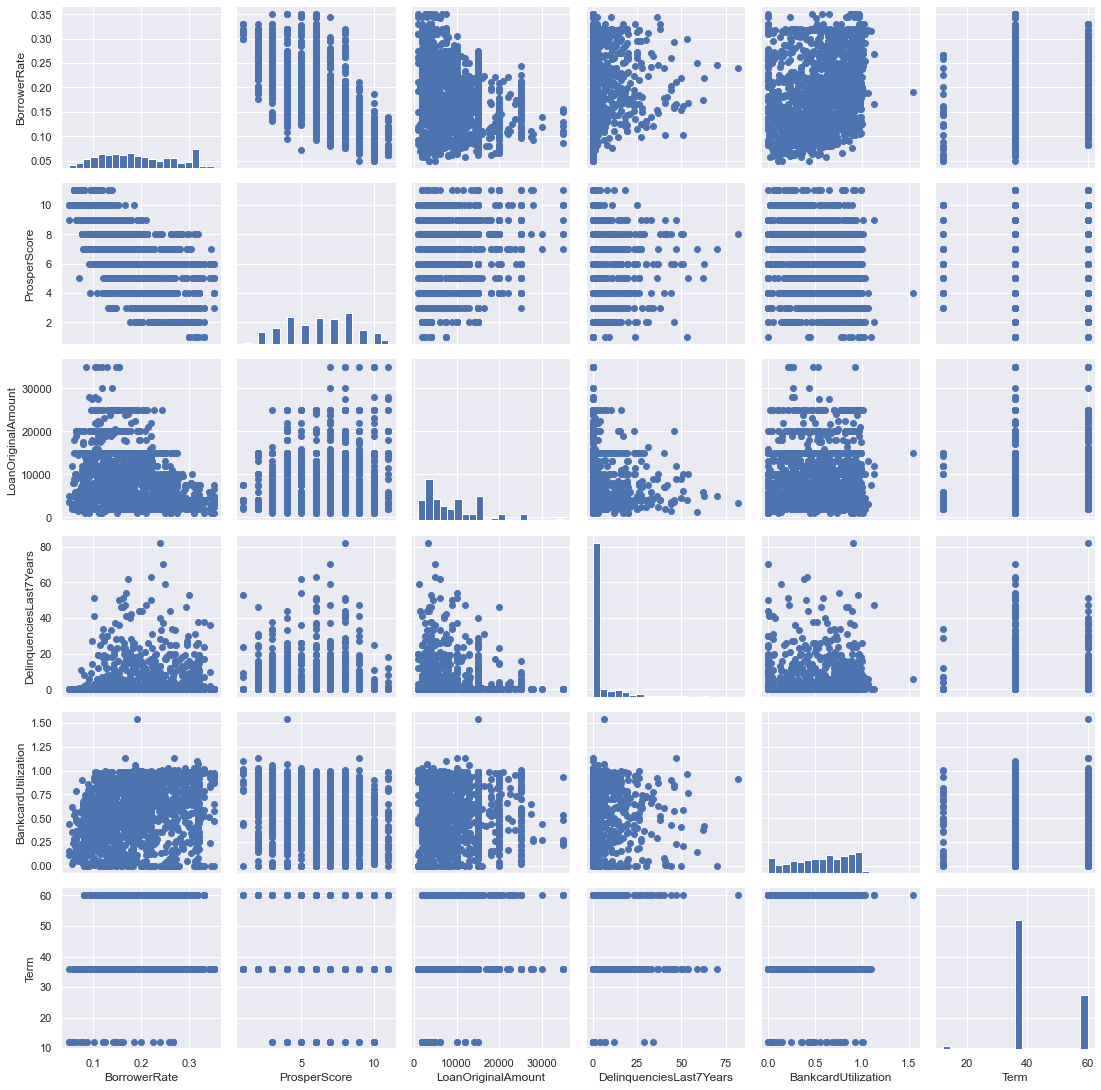

In [36]:
# After analysing distribution of dependent variable of interest, we could introduce research work 
#using  a matrix plot with all vars (at least numeric ones)

# Dataset has around 11000 observations, to performance issues when rendering charts, so let's
# take a sample and work with it
loans_sample =  loans.sample(1500, replace=False,random_state= 500)
numeric_vars = ['BorrowerRate', 'ProsperScore', 'LoanOriginalAmount', 'DelinquenciesLast7Years', 'BankcardUtilization', 'Term']
g = sb.PairGrid(data = loans_sample, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

Term parece no proporcionar informacion util, bankcard utilization tampoco parece aportar mucho
- Dificil ver alguna relacion directa entre 2 variables
- Sorprendentemente parece no haber una relacion fuerte entre delinquencies y el score asignado por prosper
- Hay una corelacion mas directa entre loan amount y delinquencies
- Interest rate parece tener una relacion mas evidente con prosper score y loan amount, 
- La relacion de Term y Bankcard utilization parecen ser irrelevantes al interes asignado.

As our main suspicious variables that may affect borrow rate/loan amount are categorical, let's create some box plots to see the big picture of it.


<Figure size 720x1080 with 0 Axes>

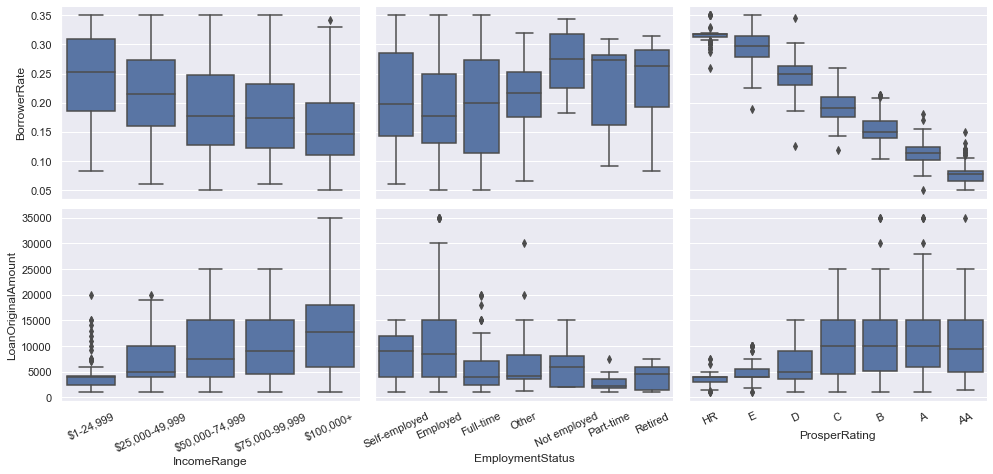

In [37]:
main_vars = ['IncomeRange', 'EmploymentStatus', 'ProsperRating']

def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    chart = sb.boxplot(x, y, color = default_color)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=25);

plt.figure(figsize = [10, 15])
g = sb.PairGrid(data = loans_sample, y_vars = ['BorrowerRate', 'LoanOriginalAmount'], x_vars = main_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

- Descubrimos que IncomeRange tiene una influencia clara con interest rate. En general, entre mayor sea el ingreso, se tiende a conseguir un mejor credito con menor tasa. Aunque incluso hay algunos casos de ingreso 100,000+ con altas tasas de interes. Seria bueno revisar que otros factores estan determinando esas tasas en particular.
- El plot de rating de riesgo vs interest añade fuerza a nuestra teoria. Es muy marcada la distribucion de acceso a prestamos con altas tasas para personas con alto riesgo. La tasa baja conforme el prestamo es menos riesgoso.
- El estado laboral del deudor parece tambien repercutir de alguna manera a la tasa de interes obtenida, aunque no es tan claro como los factores antes mencionados.

Now let´s focus on our 2 main variables: Borrower rate vs Prosper score.
As this is a numeric continuos vs numeric discrete plot, I decided to use a heat map which usually depicts better high concentrated small spots with too many observations.

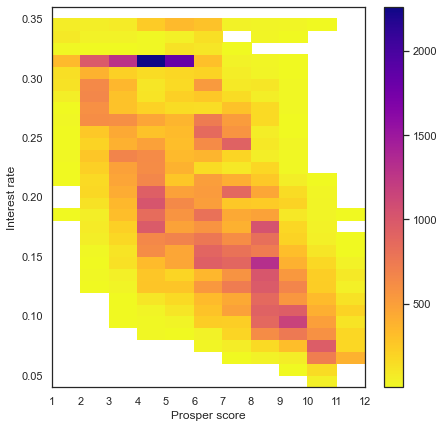

In [38]:
plt.figure(figsize=[7,7])
interest_bins = np.arange(0.04, loans.BorrowerRate.max() + 0.01, 0.01)
prosper_bins = np.arange(loans.ProsperScore.min(), loans.ProsperScore.max() + 2, 1)
sb.set_style('white')
plt.hist2d(x=loans['ProsperScore'], y=loans['BorrowerRate'], bins=[prosper_bins, interest_bins], cmap = 'plasma_r', cmin=5)
plt.xlabel('Prosper score')
plt.ylabel('Interest rate')
plt.xticks(prosper_bins, prosper_bins)
ax = plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(0.05))
ax.yaxis.set_minor_locator(MultipleLocator(0.01))
plt.colorbar()
plt.show()

- Podemos observar una concentracion diagonal negativa entre el score asignado y la tasa de interes obtenida, dando tasa preferenciales de 10% o menos, a prestamos catalogados como los menos riesgosos.
- Los prestamos de alto riesgo en general suelen ser de menor cantidad (500 o menos) con diversas tasas de interes. Y se reflejan al rededor de la diagonal inversa observada.
- De nuevo, observamos una linea interesante que contiene un grupo importante de prestamos a tasa de alrededor del 32% 

Text(0, 0.5, 'APR interest')

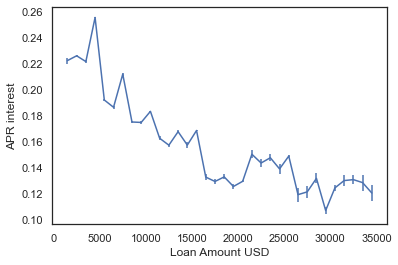

In [39]:
# Explore trends on loan amounts vs interest rates ( I expect this to be a negative correlation)
# set bin edges, compute centers

# Calculate centers for loan amount range scale
amount_step = 1000
amount_bins = np.arange(1000, loans.LoanOriginalAmount.max() + amount_step, amount_step)
amount_centers = (amount_bins + amount_step / 2)[:-1]

# Compute means for each
amount_intervals = pd.cut(loans.LoanOriginalAmount, amount_bins, right = False, include_lowest = True)
interest_means = loans['BorrowerRate'].groupby(amount_intervals).mean()
interest_sems = loans['BorrowerRate'].groupby(amount_intervals).sem()

plt.errorbar(x = amount_centers, y = interest_means, yerr = interest_sems)
plt.xlabel('Loan Amount USD')
plt.ylabel('APR interest')


Podemos ver que en general el interes tiende a disminuir cuando el prestamo crece. Tambien podemos observar que la desviacion estandar de interes tienda a ser mayor en prestamos grandes. Lo cual sugeriria que para prestamos de esas cantidades, se negocian varios otros factores qeu hacen qeu la tasa cambie. Para prestamos pequnios, parece que las tasas de interes son mas predecibles.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

<a id="multivariate_section"></a>
## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

From the previous examination, we discovered variables that could direclty influence interest rate. Among those vars we have prosper risk score, prosper rating, income range and loan amount.

There are also secondary variables that did not influence directly but could do it combining them with one of the primary variables. Such variables are loan term, delinquencies, home ownership, bank credit utilization,  prior loans...

Also found a relationship between loan amount and delinquencies.

**TODO** Let´s create a map with available numerical vars and only focus on vars with decent correlation factor:
    - interest
    - prosper score
    - prosper rating as integer code
    - loan amount
    - bank card utilization
    - feature engineering(first recorded credit line)
    - total prosper loans
    - delinquencies
    - term
    
    


In [67]:
import matplotlib
print("matplotlib version: {}, Seaborn version: {}".format(matplotlib.__version__, sb.__version__))

matplotlib version: 3.2.1, Seaborn version: 0.10.1


In [41]:
# Let´s create variable credit line history, which depicts total of months a borrower has own credit cards.
credit_time_delta = (loans['ListingCreationDate'] - loans['FirstRecordedCreditLine'])
loans['CreditHistory'] = credit_time_delta.apply(lambda time_delta: time_delta.days)
loans['ProsperRatingCode'] = loans.ProsperRating.cat.codes
loans['IncomeRangeCode'] = loans.IncomeRange.cat.codes
loans['EmploymentStatusCode'] = loans.EmploymentStatus.cat.codes

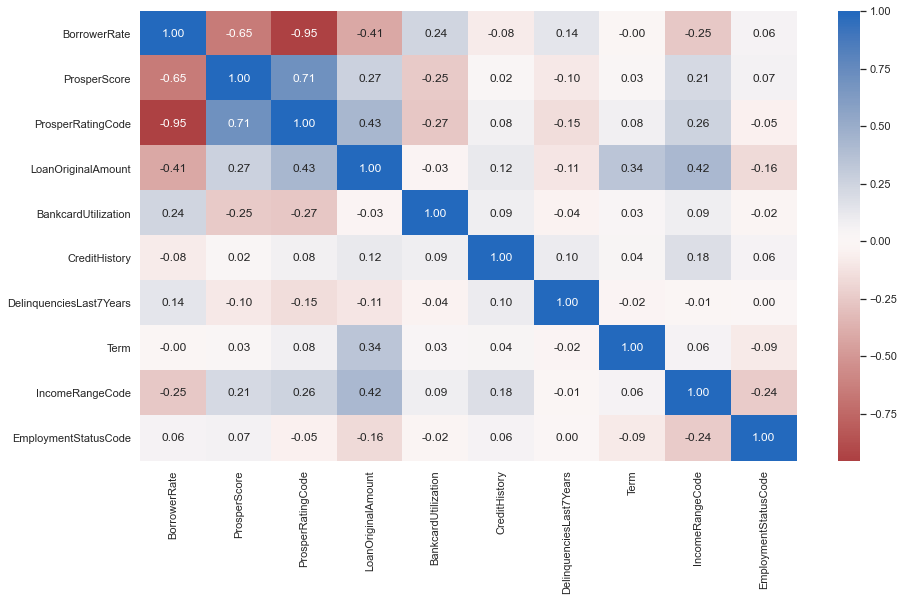

In [42]:
plt.figure(figsize=[14.70, 8.27])
adapted_df = loans[['BorrowerRate', 'ProsperScore', 'ProsperRatingCode', 'LoanOriginalAmount', 'BankcardUtilization', 'CreditHistory', 'DelinquenciesLast7Years', 'Term', 'IncomeRangeCode', 'EmploymentStatusCode']]
sb.heatmap(adapted_df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);
plt.yticks(rotation = 0);

**TODO** Create a Series of charts interest - prosper score/rating - important variable
To see which ones give more insgights

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

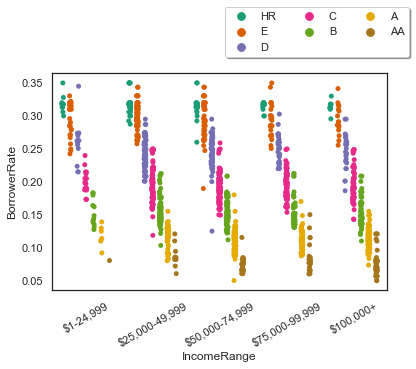

In [43]:
# interest - prosper rating - income range
ax = sb.stripplot(data = loans_sample, x = 'IncomeRange', y = 'BorrowerRate', hue = 'ProsperRating',
         jitter = True, dodge = True, palette = "Dark2")
ax.legend(loc='best', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.xticks(rotation=30)

pending comments ...

/Users/expandedmind/opt/anaconda3/envs/udacity/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


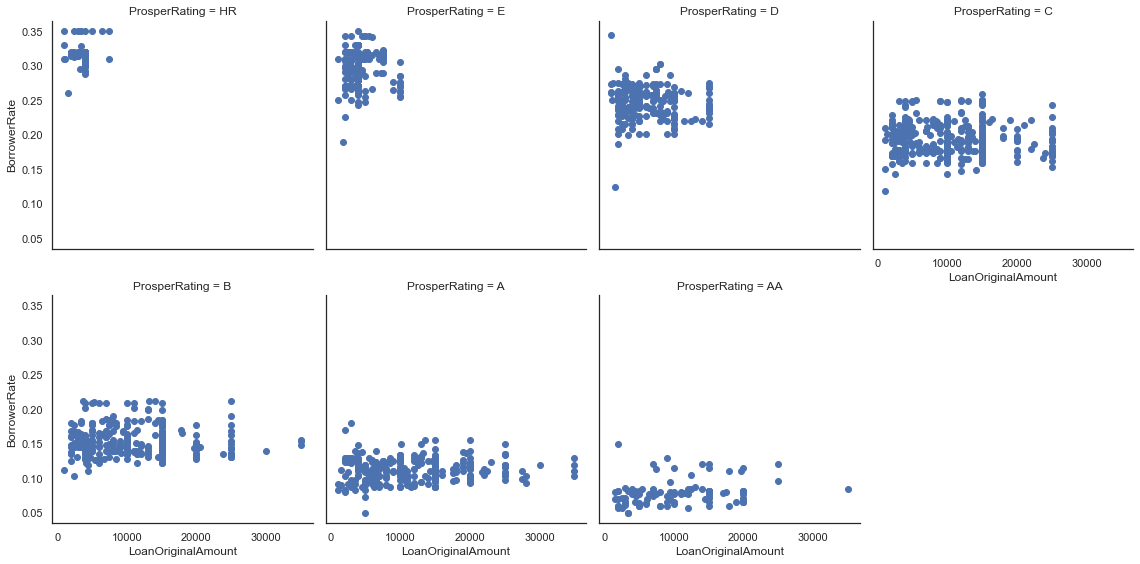

In [44]:
# interest rate, prosper rating, loan amount
g = sb.FacetGrid(loans_sample, col= 'ProsperRating', size=4, col_wrap=4)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate')

pending comments ....

Parece ser que el plazo del prestamo no tiene injerencia en el interes. Si acaso, tiene injerencia respecto al monto ya que prestamos a 1 año tenderan a ser menores que aquellos que se pagan a 3 o 5 años.

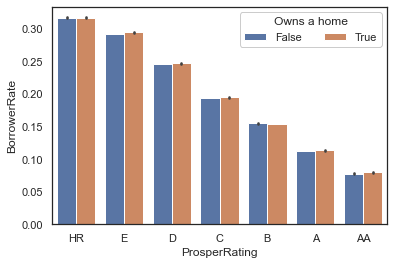

In [45]:
# Create a chart that relates PR interest, prosper rating and if borrwer owns a house
ax = sb.barplot(data = loans, x = 'ProsperRating', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner')
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'Owns a home')

pending comments ...

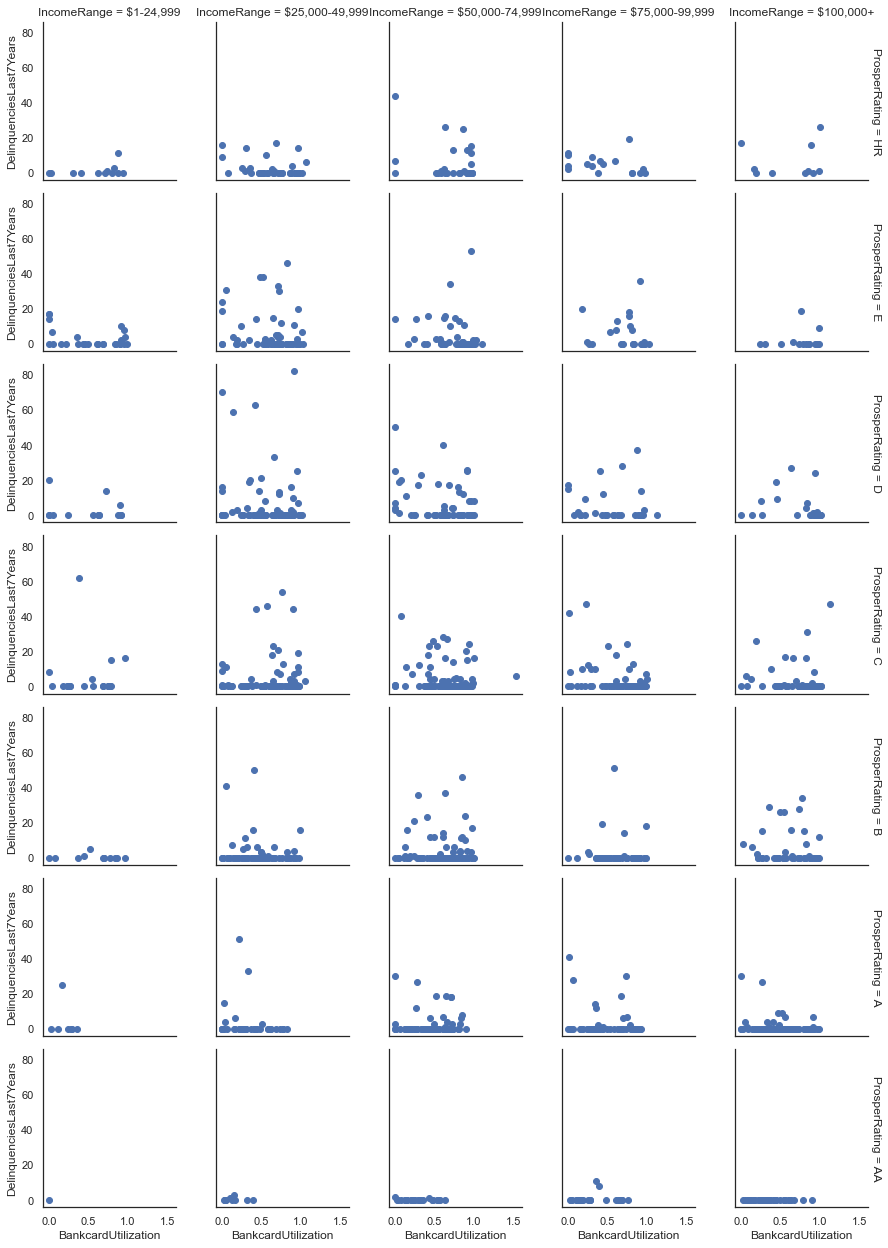

In [46]:
# Try to depict what causes a prosper rating: bankard utilization, delinquencies, income range
g = sb.FacetGrid(data = loans_sample, col = 'IncomeRange', row = 'ProsperRating', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'BankcardUtilization', 'DelinquenciesLast7Years');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

At the end we could confirm if factors other than prosper score are solid enough to 
determine interest rate. By ploting 2 different datasets: 
    Dataset before July 2009.(without prosper score)
    Dataset after July 2009 (with prosper score)

Also, if have enough time, we can quick make a chart about interst rates and loan statuses